In [38]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score, precision_score, f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns
path=r"C:\Users\owner\Downloads\churn.csv"
df=pd.read_csv(path,header=0)
print(df.tail())
print(df.shape)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.5

In [2]:
print(df.isna().sum())
print(df.dtypes)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df['Gender'].unique()
df['Gender']=df['Gender'].replace({'Female':1,'Male':0})
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France       1   42   
1          2    15647311      Hill          608     Spain       1   41   
2          3    15619304      Onio          502    France       1   42   
3          4    15701354      Boni          699    France       1   39   
4          5    15737888  Mitchell          850     Spain       1   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [5]:
df=df.drop('Surname',axis=1)
df=df.drop('CustomerId',axis=1)
df=df.drop('RowNumber',axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df['Geography'].unique()
le=LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
print(df.head())

   CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       1   42       2       0.00              1   
1          608          2       1   41       1   83807.86              1   
2          502          0       1   42       8  159660.80              3   
3          699          0       1   39       1       0.00              2   
4          850          2       1   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


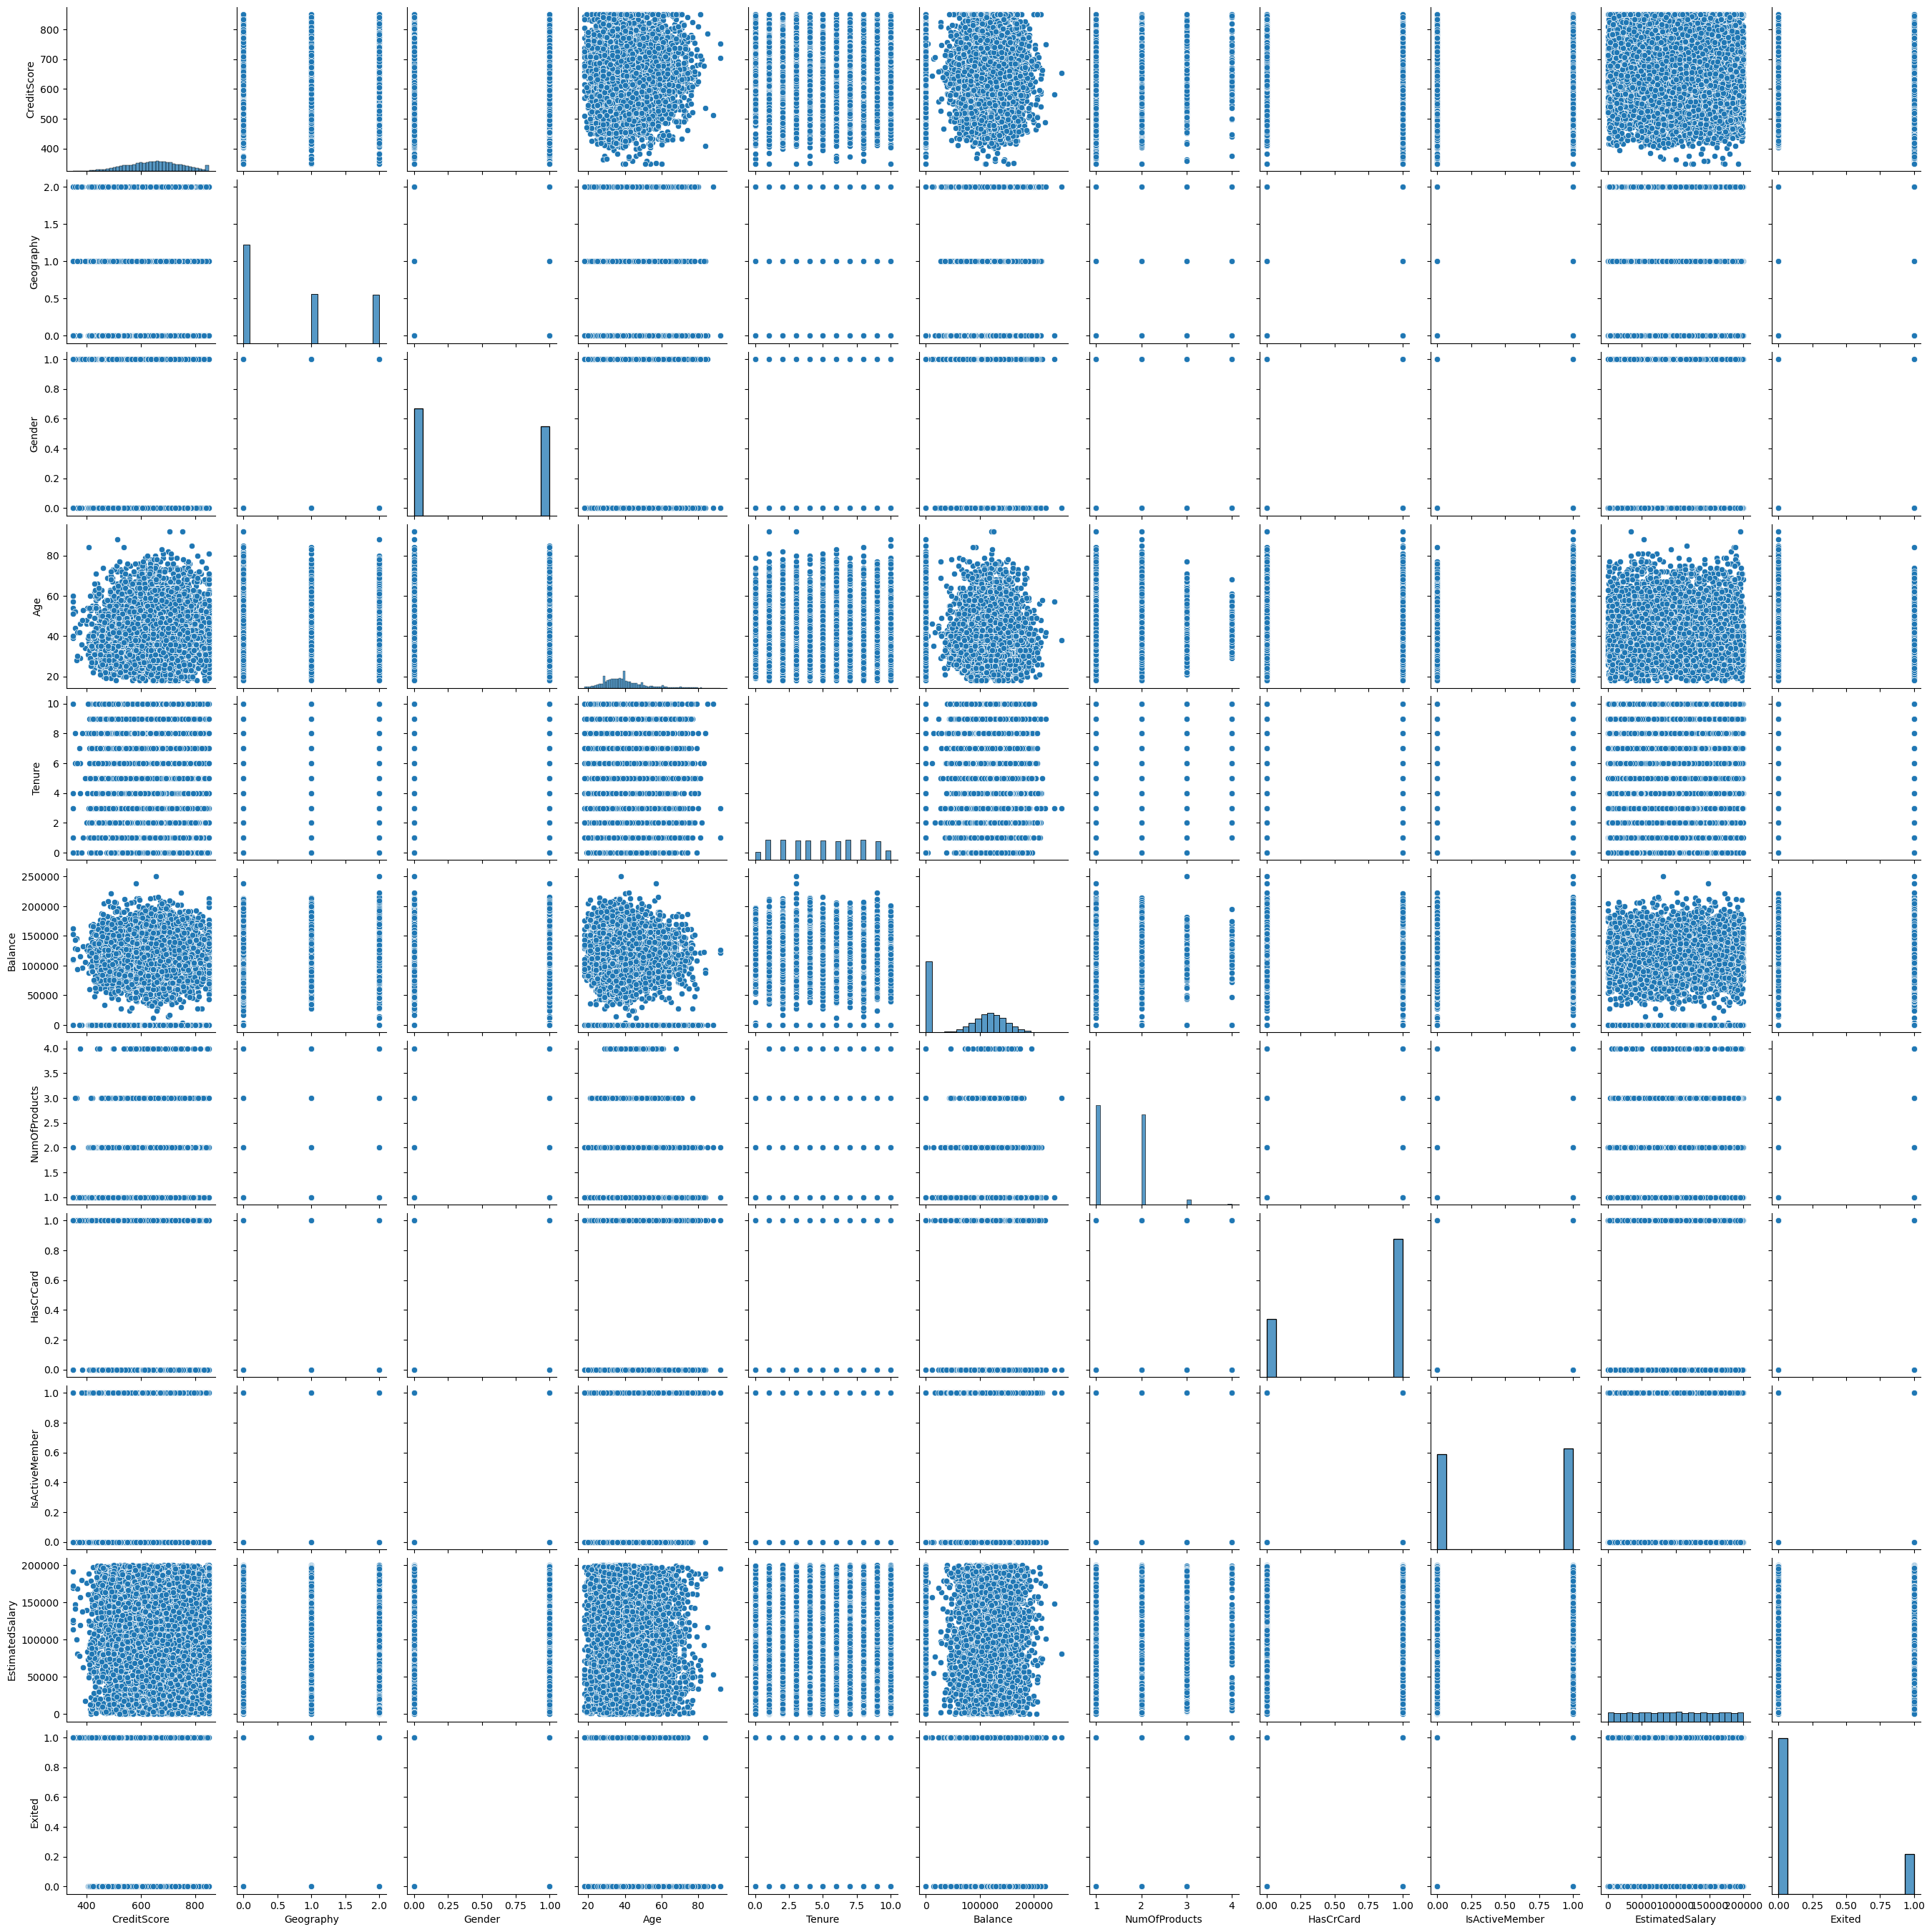

In [7]:
sns.pairplot(df)

<Axes: xlabel='Age', ylabel='Exited'>

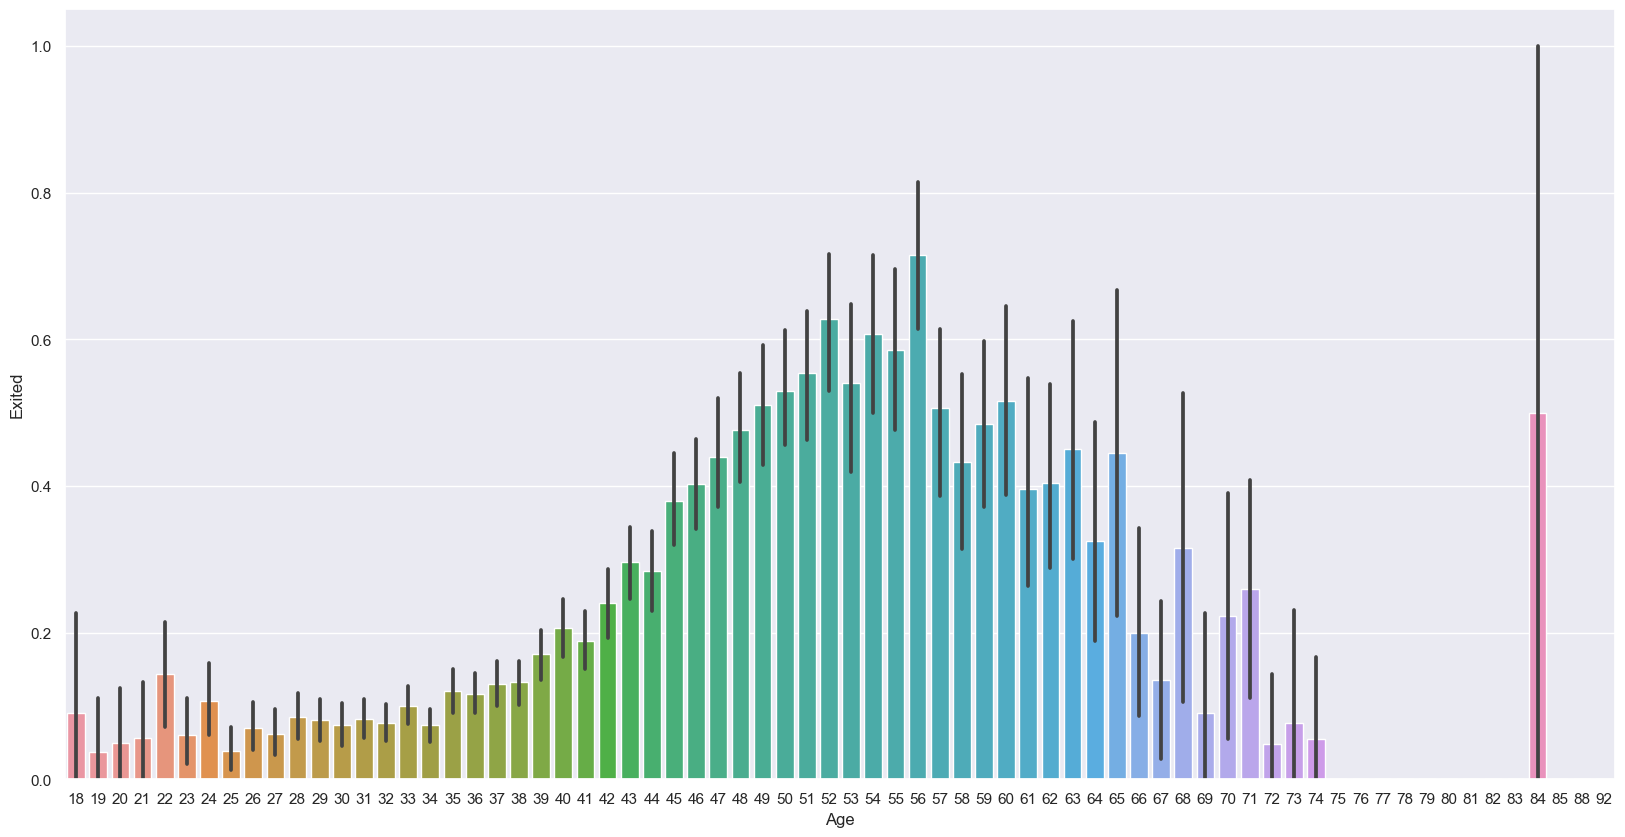

In [21]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.barplot(x='Age',y='Exited',data=df)

<Axes: xlabel='CreditScore', ylabel='Exited'>

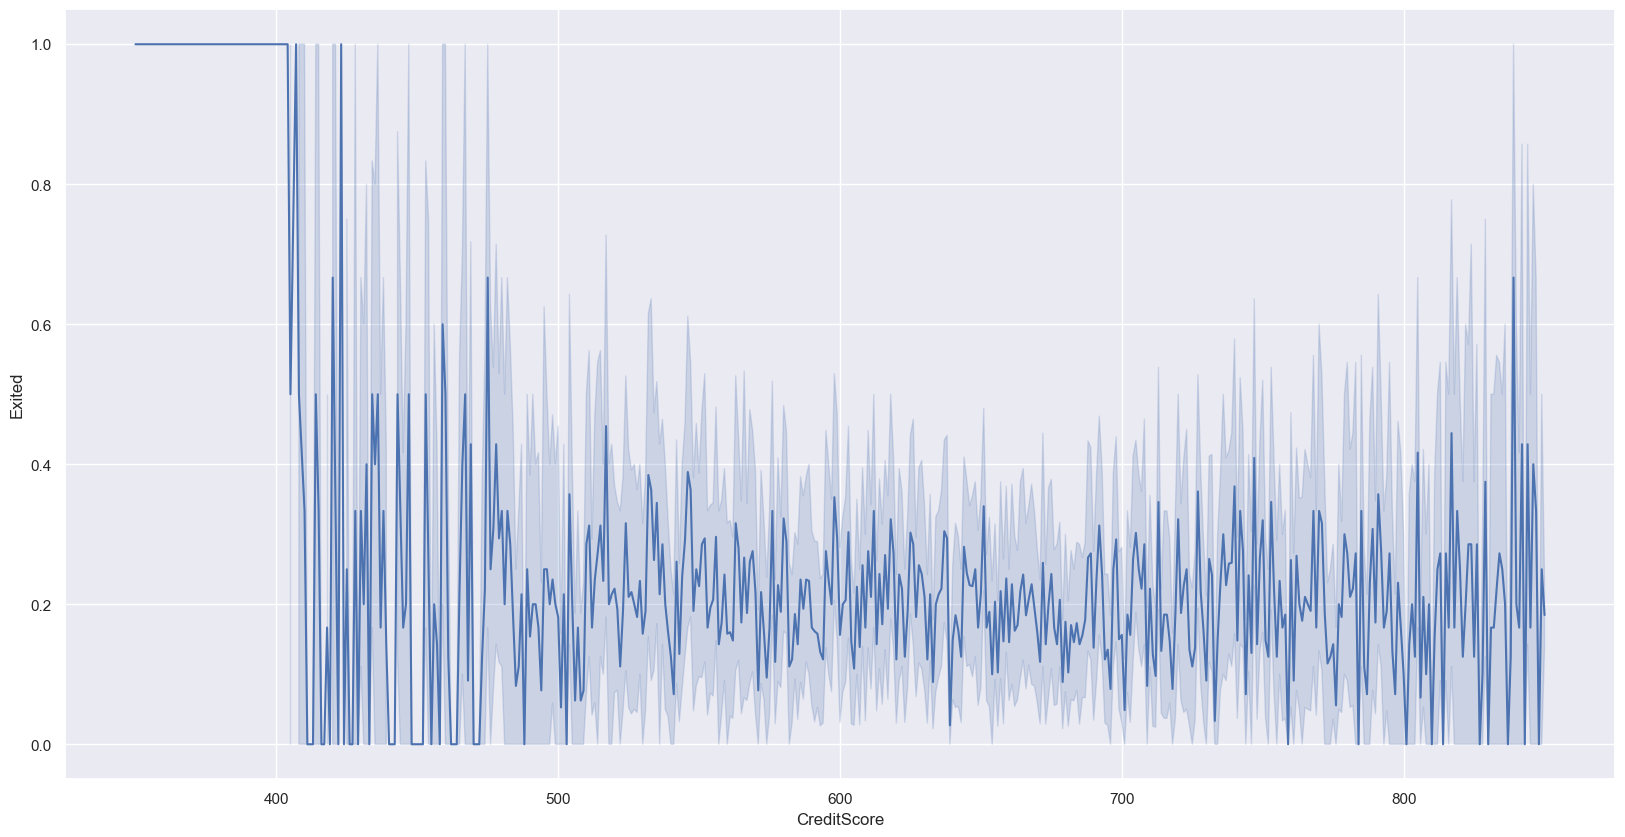

In [26]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.lineplot(x='CreditScore',y='Exited',data=df)

In [9]:
df.info()
x=df.iloc[:,:10]
y=df.iloc[:,10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(1), int64(8)
memory usage: 820.4 KB


In [10]:
print(x)
print(y)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       1   42       2       0.00              1   
1             608          2       1   41       1   83807.86              1   
2             502          0       1   42       8  159660.80              3   
3             699          0       1   39       1       0.00              2   
4             850          2       1   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       0   39       5       0.00              2   
9996          516          0       0   35      10   57369.61              1   
9997          709          0       1   36       7       0.00              1   
9998          772          1       0   42       3   75075.31              2   
9999          792          0       1   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  


In [11]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y,test_size=0.3)
print(x_training_data, x_test_data, y_training_data, y_test_data)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
2932          688          0       1   54       9       0.00              1   
4702          660          0       0   33       0   72783.42              1   
3409          598          1       1   46       7  131769.04              1   
3130          795          2       1   56       5       0.00              1   
4383          645          0       0   42       4   98298.18              1   
...           ...        ...     ...  ...     ...        ...            ...   
2778          604          2       1   71      10       0.00              2   
8469          720          0       0   71       5  183135.39              2   
7926          567          2       1   54       5   92316.31              2   
7264          434          2       0   33       3       0.00              1   
9053          732          0       1   35       3       0.00              2   

      HasCrCard  IsActiveMember  EstimatedSalary  


[0 0 0 ... 0 0 0]
0.7856666666666666
          features  Importance
3              Age    0.236516
9  EstimatedSalary    0.162745
5          Balance    0.137455
0      CreditScore    0.134858
6    NumOfProducts    0.114899
4           Tenure    0.069761
8   IsActiveMember    0.065066
1        Geography    0.040939
2           Gender    0.021818
7        HasCrCard    0.015944


<Axes: >

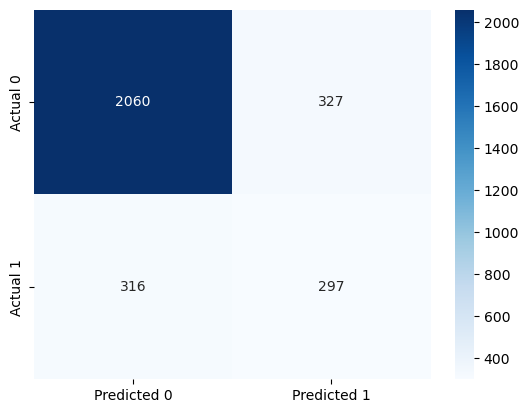

In [12]:
mod=DecisionTreeClassifier()
mod.fit(x_training_data,y_training_data)
pred=mod.predict(x_test_data)
print(pred)
acc=accuracy_score(y_test_data,pred)
print(acc)
feature_imp=mod.feature_importances_
fea_imp=pd.DataFrame({'features':x_training_data.columns,'Importance':feature_imp})
print(fea_imp.sort_values('Importance',ascending=False))
cm = confusion_matrix(y_test_data,pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

In [13]:
acc=accuracy_score(y_test_data,pred)
acc

0.7856666666666666

In [14]:
print('Recall Score: ', recall_score(y_test_data, pred))
print('Precision: ', precision_score(y_test_data, pred))
print('F1-Score: ', f1_score(y_test_data, pred))
print('Accuracy Score: ', accuracy_score(y_test_data, pred))

# Calculate and display AUC score
auc_score = roc_auc_score(y_test_data, pred)
print('AUC Score: ', auc_score)

Recall Score:  0.48450244698205547
Precision:  0.47596153846153844
F1-Score:  0.4801940177849636
Accuracy Score:  0.7856666666666666
AUC Score:  0.6737552033821044


In [15]:
model1=RandomForestClassifier(random_state=42)
model1.fit(x_training_data,y_training_data)
y1=model1.predict(x_test_data)
print(y1)
feature_imp=model1.feature_importances_
fea_imp=pd.DataFrame({'features':x_training_data.columns,'Importance':feature_imp})
print(fea_imp.sort_values('Importance',ascending=False))

[0 0 0 ... 0 0 0]
          features  Importance
3              Age    0.246803
9  EstimatedSalary    0.146034
0      CreditScore    0.139732
5          Balance    0.139471
6    NumOfProducts    0.128115
4           Tenure    0.079642
8   IsActiveMember    0.043159
1        Geography    0.038744
2           Gender    0.019705
7        HasCrCard    0.018596


In [29]:
acc1=accuracy_score(y_test_data,y1)
print(acc1)
print('Recall Score: ', recall_score(y_test_data, y1))
print('Precision: ', precision_score(y_test_data, y1))
print('F1-Score: ', f1_score(y_test_data, y1))
print('Accuracy Score: ', accuracy_score(y_test_data, y1))
auc_score = roc_auc_score(y_test_data, y1)
print('AUC Score: ', auc_score)

0.8566666666666667
Recall Score:  0.4371941272430669
Precision:  0.7592067988668555
F1-Score:  0.5548654244306418
Accuracy Score:  0.8566666666666667
AUC Score:  0.7007922877522414


<Axes: >

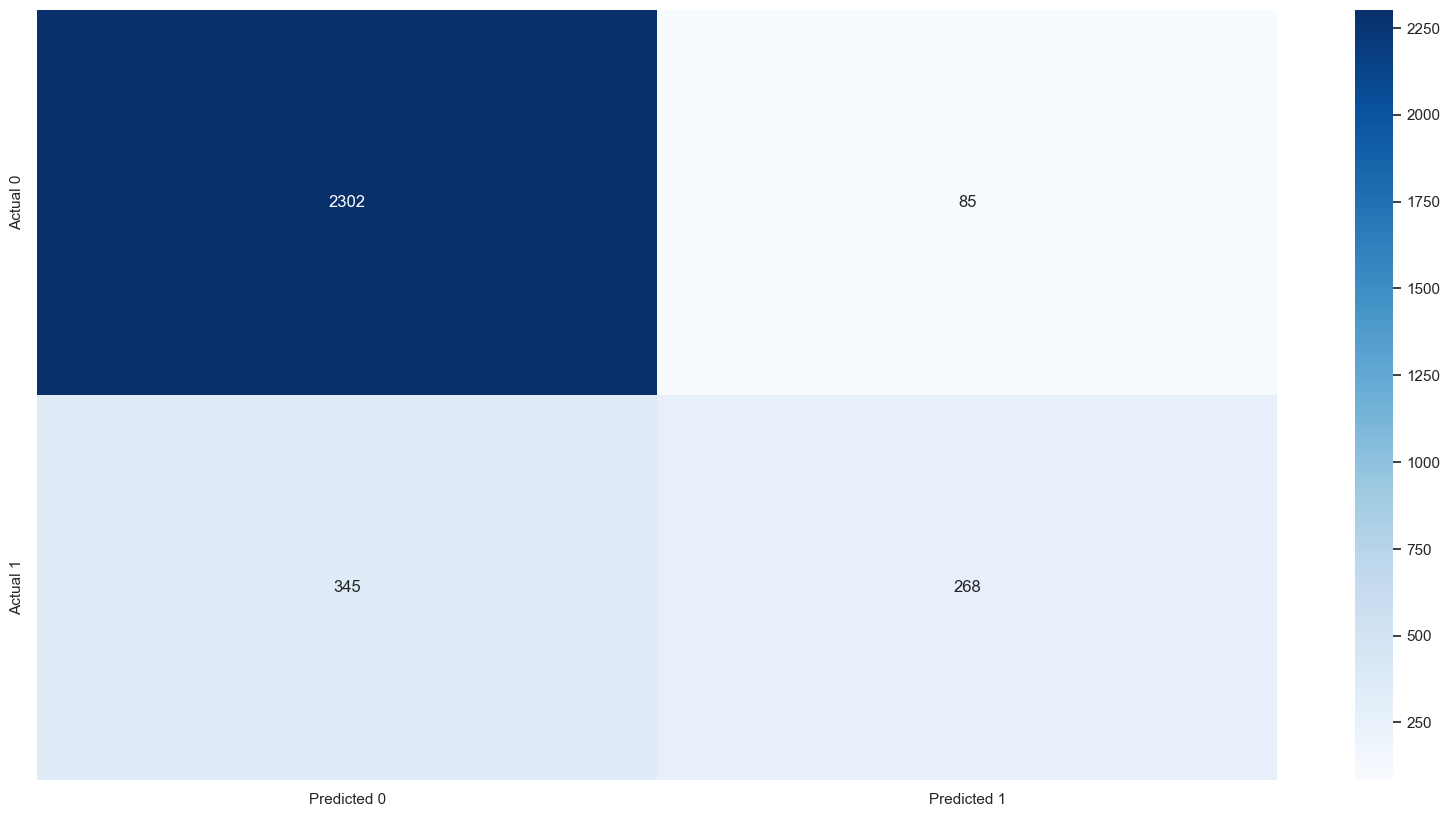

In [41]:
cm = confusion_matrix(y_test_data, y1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

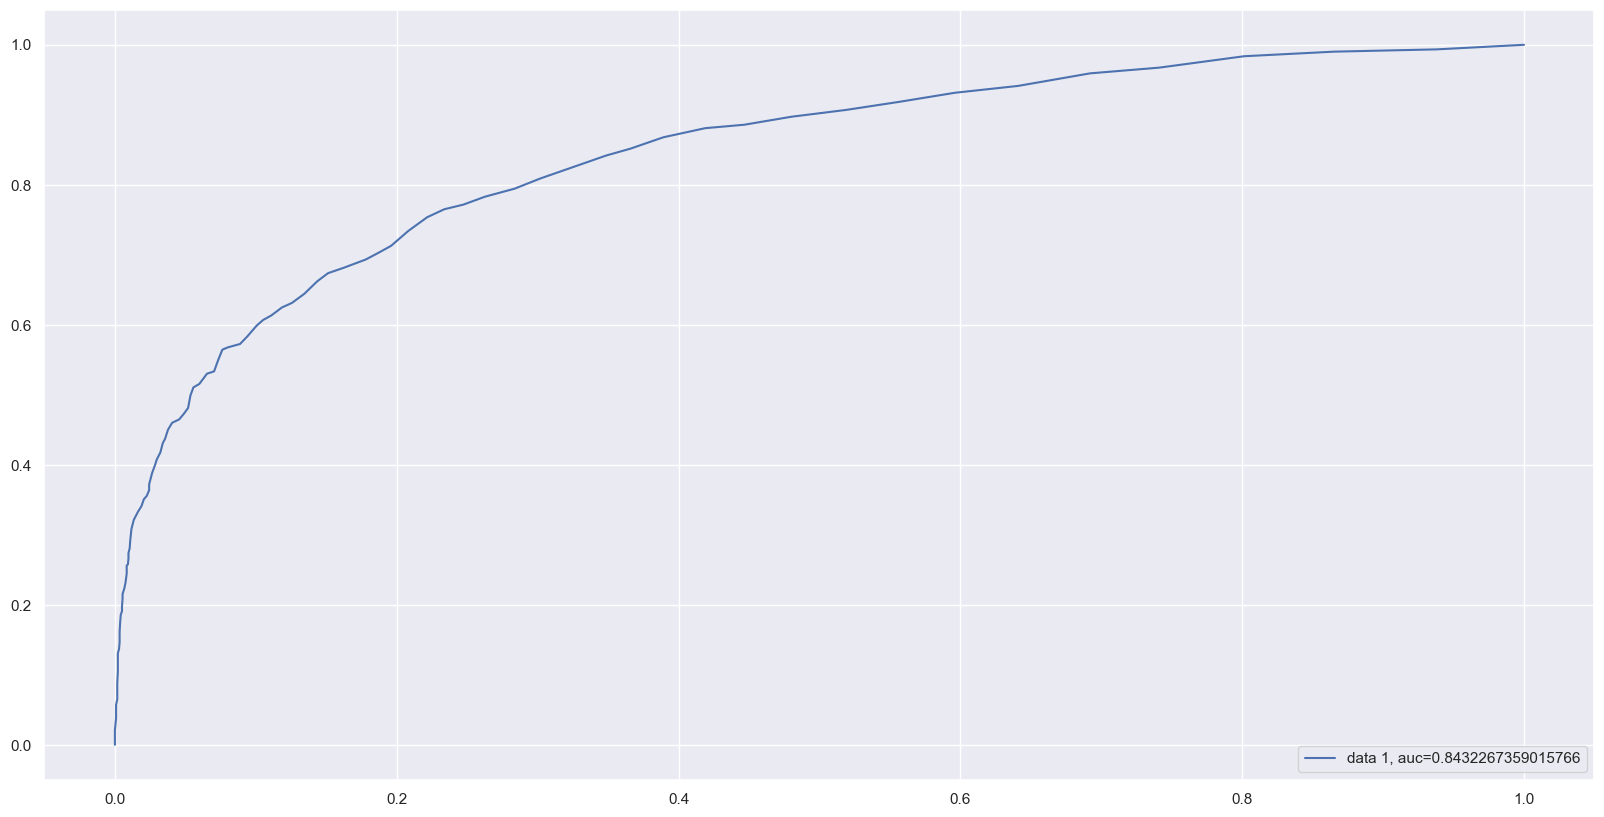

In [40]:
y_pred_proba = model1.predict_proba(x_test_data)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_data,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_data, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()